In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971945e+07,1.971945e+07,False,NaN,1,NaN,NaN,None,2024-07-04T21:11:00.000Z,58377.070185,3.941607e+10,36.3382,0.349349,-2.332805,-4.963065,-17.090368,-8.318254,-13.712361,1.151164e+12,53.8632,1.225918e+12,None,2024-07-04T21:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:16:41.705452
1,1027,Ethereum,ETH,ethereum,9118,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201951e+08,1.201951e+08,True,NaN,2,NaN,NaN,None,2024-07-04T21:10:00.000Z,3140.289169,1.953902e+10,24.9648,0.382840,-4.054462,-8.749054,-17.458045,0.195641,-5.720745,3.774475e+11,17.6563,3.774475e+11,None,2024-07-04T21:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:16:41.705452
2,825,Tether USDt,USDT,tether,90932,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.124849e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-04T21:10:00.000Z,0.999558,7.275580e+10,32.3611,0.008813,0.063995,0.108237,-0.058508,-0.121493,-0.075788,1.124351e+11,5.2590,1.160255e+11,None,2024-07-04T21:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-04 23:16:41.705452
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475829e+08,1.475829e+08,False,NaN,4,NaN,NaN,None,2024-07-04T21:10:00.000Z,524.431357,2.014885e+09,16.7605,0.239206,-5.394823,-9.424136,-21.720655,-11.410401,-9.871223,7.739711e+10,3.6204,7.739711e+10,None,2024-07-04T21:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:16:41.705452
4,5426,Solana,SOL,solana,698,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.628857e+08,5.795346e+08,True,NaN,5,NaN,NaN,None,2024-07-04T21:10:00.000Z,134.701500,3.099877e+09,11.0371,0.972404,-3.879755,-9.943463,-20.437051,-7.363121,-23.420310,6.235140e+10,2.9174,7.806418e+10,None,2024-07-04T21:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:16:41.705452
5,3408,USDC,USDC,usd-coin,20788,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.291438e+10,3.291438e+10,False,NaN,6,NaN,NaN,None,2024-07-04T21:10:00.000Z,1.000015,6.890132e+09,17.8372,0.002003,0.010339,0.024139,-0.006207,-0.034640,0.003582,3.291486e+10,1.5397,3.291486e+10,None,2024-07-04T21:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-04 23:16:41.705452
6,52,XRP,XRP,xrp,1348,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-07-04T21:11:00.000Z,0.443941,1.523691e+09,26.4461,0.610236,-4.221002,-6.487666,-15.479696,-16.106115,-24.715882,2.472235e+10,1.1566,4.439413e+10,None,2024-07-04T21:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:16:41.705452
7,11419,Toncoin,TON,toncoin,450,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.494539e+09,5.108526e+09,True,NaN,8,3.414167e+09,2.479982e+10,None,2024-07-04T21:10:00.000Z,7.263799,5.133540e+08,39.6258,0.998903,-6.836661,-7.202407,2.603895,23.748150,33.089740,1.811983e+10,0.8478,3.710731e+10,None,2024-07-04T21:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:16:41.705452
8,74,Dogecoin,DOGE,dogecoin,1018,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchan

In [29]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    #for transfering dataframe into a csv file
    
    #if not os.path.isfile(r'C:\Users\Varun\OneDrive\Documents\Projects\API.csv'):
        #df.to_csv(r'C:\Users\Varun\OneDrive\Documents\Projects\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: 
    #df11 = pd.read_csv(r'C:\Users\Varun\OneDrive\Documents\Projects\API.csv')
    #df11 

    

In [7]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971945e+07,1.971945e+07,False,NaN,1,NaN,NaN,None,2024-07-04T21:17:00.000Z,58403.861147,3.939518e+10,35.9592,0.369346,-2.333422,-4.933068,-17.065004,-8.288054,-13.751362,1.151692e+12,53.7813,1.226481e+12,None,2024-07-04T21:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:22:22.525475
1,1027,Ethereum,ETH,ethereum,9118,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201951e+08,1.201951e+08,True,NaN,2,NaN,NaN,None,2024-07-04T21:16:00.000Z,3149.125509,1.952012e+10,24.2672,0.576100,-3.838256,-8.484954,-17.293066,0.605224,-5.467825,3.785096e+11,17.6973,3.785096e+11,None,2024-07-04T21:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:22:22.525475
2,825,Tether USDt,USDT,tether,90932,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.124849e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-04T21:16:00.000Z,0.999613,7.269210e+10,31.8092,0.008391,0.057296,0.095387,-0.052027,-0.055461,-0.071255,1.124413e+11,5.2500,1.160319e+11,None,2024-07-04T21:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-04 23:22:22.525475
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475829e+08,1.475829e+08,False,NaN,4,NaN,NaN,None,2024-07-04T21:16:00.000Z,526.104215,2.017226e+09,16.6234,0.476677,-5.065836,-9.097405,-21.452285,-11.020088,-9.698662,7.764400e+10,3.6249,7.764400e+10,None,2024-07-04T21:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:22:22.525475
4,5426,Solana,SOL,solana,698,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.628857e+08,5.795346e+08,True,NaN,5,NaN,NaN,None,2024-07-04T21:16:00.000Z,135.163990,3.095764e+09,10.6755,1.125799,-3.324723,-9.541815,-20.183275,-6.983153,-23.294661,6.256548e+10,2.9232,7.833221e+10,None,2024-07-04T21:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:22:22.525475
5,3408,USDC,USDC,usd-coin,20788,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.291438e+10,3.291438e+10,False,NaN,6,NaN,NaN,None,2024-07-04T21:16:00.000Z,1.000206,6.879071e+09,17.3434,0.014761,0.015468,0.027564,0.014769,0.014430,0.020862,3.292117e+10,1.5392,3.292117e+10,None,2024-07-04T21:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-04 23:22:22.525475
6,52,XRP,XRP,xrp,1348,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-07-04T21:17:00.000Z,0.444245,1.523099e+09,26.0315,0.642666,-4.133193,-6.394794,-15.341548,-15.980477,-24.711921,2.473925e+10,1.1551,4.442448e+10,None,2024-07-04T21:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:22:22.525475
7,11419,Toncoin,TON,toncoin,450,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.494539e+09,5.108526e+09,True,NaN,8,3.414167e+09,2.486433e+10,None,2024-07-04T21:16:00.000Z,7.282694,5.148041e+08,39.8404,1.101008,-6.649466,-7.039882,2.619074,24.371258,33.647707,1.816696e+10,0.8484,3.720383e+10,None,2024-07-04T21:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:22:22.525475
8,74,Dogecoin,DOGE,dogecoin,1018,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19719450.00000,19719450.00000,False,NaN,1,NaN,NaN,None,2024-07-04T21:17:00.000Z,58403.86115,39395175641.67365,35.95920,0.36935,-2.33342,-4.93307,-17.06500,-8.28805,-13.75136,1151692019699.58862,53.78130,1226481084091.65991,None,2024-07-04T21:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:22:22.525475
1,1027,Ethereum,ETH,ethereum,9118,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120195136.34302,120195136.34302,True,NaN,2,NaN,NaN,None,2024-07-04T21:16:00.000Z,3149.12551,19520121990.64674,24.26720,0.57610,-3.83826,-8.48495,-17.29307,0.60522,-5.46782,378509569944.27789,17.69730,378509569944.28003,None,2024-07-04T21:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:22:22.525475
2,825,Tether USDt,USDT,tether,90932,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112484875382.93484,116076856617.38103,True,NaN,3,NaN,NaN,None,2024-07-04T21:16:00.000Z,0.99961,72692096355.02289,31.80920,0.00839,0.05730,0.09539,-0.05203,-0.05546,-0.07125,112441346518.07042,5.25000,116031937744.61000,None,2024-07-04T21:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-04 23:22:22.525475
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582926.61596,147582926.61596,False,NaN,4,NaN,NaN,None,2024-07-04T21:16:00.000Z,526.10421,2017226091.76649,16.62340,0.47668,-5.06584,-9.09741,-21.45228,-11.02009,-9.69866,77643999728.64925,3.62490,77643999728.64999,None,2024-07-04T21:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:22:22.525475
4,5426,Solana,SOL,solana,698,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462885682.20666,579534619.04347,True,NaN,5,NaN,NaN,None,2024-07-04T21:16:00.000Z,135.16399,3095764164.21596,10.67550,1.12580,-3.32472,-9.54182,-20.18327,-6.98315,-23.29466,62565475500.86456,2.92320,78332211177.53000,None,2024-07-04T21:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:22:22.525475
5,3408,USDC,USDC,usd-coin,20788,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32914376804.45195,32914376804.45195,False,NaN,6,NaN,NaN,None,2024-07-04T21:16:00.000Z,1.00021,6879071121.34548,17.34340,0.01476,0.01547,0.02756,0.01477,0.01443,0.02086,32921166767.70209,1.53920,32921166767.70000,None,2024-07-04T21:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-04 23:22:22.525475
6,52,XRP,XRP,xrp,1348,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55688327582.00000,99987490594.00000,False,NaN,7,NaN,NaN,None,2024-07-04T21:17:00.000Z,0.44424,1523099358.91312,26.03150,0.64267,-4.13319,-6.39479,-15.34155,-15.98048,-24.71192,24739247873.22474,1.15510,44424476272.51000,None,2024-07-04T21:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 23:22:22.525475
7,11419,Toncoin,TON,toncoin,450,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2494538703.85816,5108525981.65374,True,NaN,8,3414166606.00000,24864330704.98249,None,2024-07-04T21:16:00.000Z,7.28269,514804141.82012,39.84040,1.10101,-6.64947,-7.03988,2.61907,24.37126,33.64771,18166962086.76692,0.84840,37203831587.95000,None,2024

In [13]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.36935,-2.33342,-4.93307,-17.06500,-8.28805,-13.75136
Ethereum,0.57610,-3.83826,-8.48495,-17.29307,0.60522,-5.46782
Tether USDt,0.00839,0.05730,0.09539,-0.05203,-0.05546,-0.07125
BNB,0.47668,-5.06584,-9.09741,-21.45228,-11.02009,-9.69866
Solana,1.12580,-3.32472,-9.54182,-20.18327,-6.98315,-23.29466
USDC,0.01476,0.01547,0.02756,0.01477,0.01443,0.02086
XRP,0.64267,-4.13319,-6.39479,-15.34155,-15.98048,-24.71192
Toncoin,1.10101,-6.64947,-7.03988,2.61907,24.37126,33.64771
Dogecoin,1.03005,-7.28847,-12.83550,-32.19854,-32.12947,-39.06393


In [14]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.36935
             quote.USD.percent_change_24h    -2.33342
             quote.USD.percent_change_7d     -4.93307
             quote.USD.percent_change_30d   -17.06500
             quote.USD.percent_change_60d    -8.28805
             quote.USD.percent_change_90d   -13.75136
Ethereum     quote.USD.percent_change_1h      0.57610
             quote.USD.percent_change_24h    -3.83826
             quote.USD.percent_change_7d     -8.48495
             quote.USD.percent_change_30d   -17.29307
             quote.USD.percent_change_60d     0.60522
             quote.USD.percent_change_90d    -5.46782
Tether USDt  quote.USD.percent_change_1h      0.00839
             quote.USD.percent_change_24h     0.05730
             quote.USD.percent_change_7d      0.09539
             quote.USD.percent_change_30d    -0.05203
             quote.USD.percent_change_60d    -0.05546
             quote.USD.percent_change_90

In [15]:
type(df4)


pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.36935
            quote.USD.percent_change_24h  -2.33342
            quote.USD.percent_change_7d   -4.93307
            quote.USD.percent_change_30d -17.06500
            quote.USD.percent_change_60d  -8.28805
            quote.USD.percent_change_90d -13.75136
Ethereum    quote.USD.percent_change_1h    0.57610
            quote.USD.percent_change_24h  -3.83826
            quote.USD.percent_change_7d   -8.48495
            quote.USD.percent_change_30d -17.29307
            quote.USD.percent_change_60d   0.60522
            quote.USD.percent_change_90d  -5.46782
Tether USDt quote.USD.percent_change_1h    0.00839
            quote.USD.percent_change_24h   0.05730
            quote.USD.percent_change_7d    0.09539
            quote.USD.percent_change_30d  -0.05203
            quote.USD.percent_change_60d  -0.05546
            quote.USD.percent_change_90d  -0.07125
BNB         quote.USD.percent_change_1h    0.47668
            quote.USD.percent_change_24h  -5.06584
            quote.USD.percent_change_7d   -9.09741
            quote.USD.percent_change_30d -21.45228
            quote.USD.percent_change_60d -11.02009
            quote.USD.percent_change_90d  -9.69866
Solana      quote.USD.percent_change_1h    1.12580
            quote.USD.percent_change_24h  -3.32472
            quote.USD.percent_change_7d   -9.54182
            quote.USD.percent_change_30d -20.18327
            quote.USD.percent_change_60d  -6.98315
            quote.USD.percent_change_90d -23.29466
USDC        quote.USD.percent_change_1h    0.01476
            quote.USD.percent_change_24h   0.01547
            quote.USD.percent_change_7d    0.02756
            quote.USD.percent_change_30d   0.01477
            quote.USD.percent_change_60d   0.01443
            quote.USD.percent_change_90d   0.02086
XRP         quote.USD.percent_change_1h    0.64267
            quote.USD.percent_change_24h  -4.13319
            quote.USD.percent_change_7d   -6.39479
            quote.USD.percent_change_30d -15.34155
            quote.USD.percent_change_60d -15.98048
            quote.USD.percent_change_90d -24.71192
Toncoin     quote.USD.percent_change_1h    1.10101
            quote.USD.percent_change_24h  -6.64947
            quote.USD.percent_change_7d   -7.03988
            quote.USD.percent_change_30d   2.61907
            quote.USD.percent_change_60d  24.37126
            quote.USD.percent_change_90d  33.64771
Dogecoin    quote.USD.percent_change_1h    1.03005
            quote.USD.percent_change_24h  -7.28847
            quote.USD.percent_change_7d  -12.83550
            quote.USD.percent_change_30d -32.19854
            quote.USD.percent_change_60d -32.12947
            quote.USD.percent_change_90d -39.06393
Cardano     quote.USD.percent_change_1h    0.01532
            quote.USD.percent_change_24h  -6.37210
            quote.USD.percent_change_7d   -3.81314
            quote.USD.percent_change_30d -18.08753
            quote.USD.percent_change_60d -18.06065
            quote.USD.percent_change_90d -34.60895
TRON        quote.USD.percent_change_1h    0.31884
            quote.USD.percent_change_24h  -0.80237
            quote.USD.percent_change_7d    4.57882
            quote.USD.percent_change_30d  11.73054
            quote.USD.percent_change_60d   5.65814
            quote.USD.percent_change_90d   8.21744
Avalanche   quote.USD.percent_change_1h   -0.08240
            quote.USD.percent_change_24h  -4.20809
            quote.USD.percent_change_7d   -9.13957
            quote.USD.percent_change_30d -28.75558
            quote.USD.percent_change_60d -31.39357
            quote.USD.percent_change_90d -43.97649
Shiba Inu   quote.USD.percent_change_1h    0.17333
            quote.USD.percent_change_24h  -6.26531
            quote.USD.percent_change_7d  -12.87056
            quote.USD.percent_change_30d -37.46941
            quote.USD.percent_change_60d -38.04793
            quo

In [17]:
df5.count()

values    90
dtype: int64

In [23]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.36935
1,Bitcoin,quote.USD.percent_change_24h,-2.33342
2,Bitcoin,quote.USD.percent_change_7d,-4.93307
3,Bitcoin,quote.USD.percent_change_30d,-17.06500
4,Bitcoin,quote.USD.percent_change_60d,-8.28805
5,Bitcoin,quote.USD.percent_change_90d,-13.75136
6,Ethereum,quote.USD.percent_change_1h,0.57610
7,Ethereum,quote.USD.percent_change_24h,-3.83826
8,Ethereum,quote.USD.percent_change_7d,-8.48495
9,Ethereum,quote.USD.percent_change_30d,-17.29307


In [24]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.36935
1,Bitcoin,quote.USD.percent_change_24h,-2.33342
2,Bitcoin,quote.USD.percent_change_7d,-4.93307
3,Bitcoin,quote.USD.percent_change_30d,-17.06500
4,Bitcoin,quote.USD.percent_change_60d,-8.28805
5,Bitcoin,quote.USD.percent_change_90d,-13.75136
6,Ethereum,quote.USD.percent_change_1h,0.57610
7,Ethereum,quote.USD.percent_change_24h,-3.83826
8,Ethereum,quote.USD.percent_change_7d,-8.48495
9,Ethereum,quote.USD.percent_change_30d,-17.29307


In [27]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d','quote.USD.percent_change_1h'],['24h','7d','30d','60d','90d','1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.36935
1,Bitcoin,24h,-2.33342
2,Bitcoin,7d,-4.93307
3,Bitcoin,30d,-17.06500
4,Bitcoin,60d,-8.28805
5,Bitcoin,90d,-13.75136
6,Ethereum,1h,0.57610
7,Ethereum,24h,-3.83826
8,Ethereum,7d,-8.48495
9,Ethereum,30d,-17.29307


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

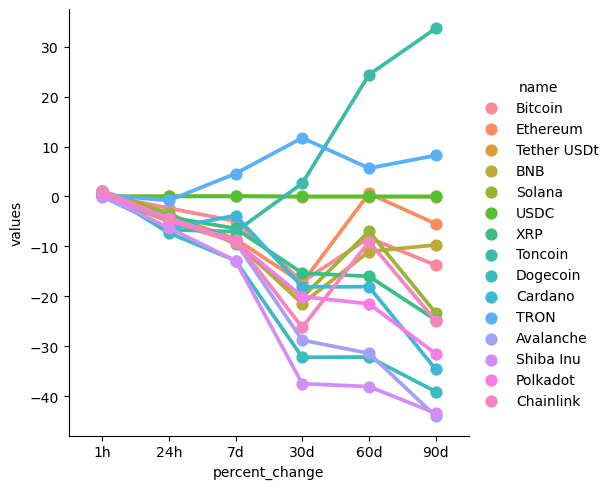

In [28]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')